<a href="https://colab.research.google.com/github/frank-lacriola/Data-Science-Lab/blob/main/flights_lab5_DSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
source = "drive/MyDrive/data/flight_delay_data.csv"

In [3]:
flights_df = pd.read_csv(source, parse_dates=[0]).drop(axis=1, columns=['Unnamed: 32'])

In [4]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                450017 non-null  datetime64[ns]
 1   UNIQUE_CARRIER         450017 non-null  object        
 2   AIRLINE_ID             450017 non-null  int64         
 3   TAIL_NUM               449378 non-null  object        
 4   FL_NUM                 450017 non-null  int64         
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64         
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64         
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64         
 8   ORIGIN                 450017 non-null  object        
 9   ORIGIN_CITY_NAME       450017 non-null  object        
 10  DEST_AIRPORT_ID        450017 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64         
 12  DEST_CITY_MARKET_ID    450017 non-null  int6

In [5]:
flights_df.describe()

,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,441476.000000,441476.000000,441244.000000,441244.00000,440746.000000,440746.000000,450017.000000,440746.000000,439645.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000
mean,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,12698.024626,1.269805e+06,31738.404640,1327.757407,1333.947392,12.134768,17.066131,1357.31372,1482.709844,7.694634,1506.278285,1487.332958,6.954484,0.019746,20.308836,3.368857,15.742495,0.079745,24.947492
std,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,1534.246611,1.534244e+05,1285.791081,481.548320,494.957196,47.274204,9.948178,495.52371,519.134977,6.494151,501.853851,523.821795,49.595992,0.139126,60.649157,27.809756,32.328181,2.896287,47.850860
min,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,1.000000,-59.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,11292.000000,1.129202e+06,30647.000000,917.000000,921.000000,-5.000000,11.000000,938.00000,1104.000000,5.000000,1120.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,12892.000000,1.289204e+06,31454.000000,1321.000000,1330.000000,-2.000000,14.000000,1343.00000,1518.000000,6.000000,1529.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000
75%,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,14057.000000,1.405702e+06,32467.000000,1730.000000,1738.000000,10.000000,20.000000,1752.00000,1916.000000,9.000000,1921.000000,1921.000000,11.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000
max,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,2400.000000,2755.000000,176.000000,2400.00000,2400.000000,413.000000,2359.000000,2400.000000,1944.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000


In [6]:
flights_df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",12892,1289204,32575,LAX,"Los Angeles, CA",800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",12173,1217302,32134,HNL,"Honolulu, HI",1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0


In [7]:
flights_df.isna()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
450013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
450014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
450015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [8]:
# The number of unique carriers is:
pd.Series(pd.unique(flights_df.iloc[:,1])).count()

12

In [9]:
# The number of unique airports is:
dest_unique = pd.unique(flights_df.iloc[:, 10]).astype(int)
source_unique = pd.unique(flights_df.iloc[:, 5])
array = np.concatenate((source_unique, dest_unique), axis=None)
np.count_nonzero(np.unique(array))

298

In [10]:
# The first data is:
pd.unique(flights_df.iloc[:, 0]).min()

numpy.datetime64('2017-01-01T00:00:00.000000000')

In [11]:
# Let's filter out all canceled flights
flights_df = flights_df.loc[flights_df.loc[:,'CANCELLED'] == 0]
pd.unique(flights_df.loc[:, 'CANCELLED'])

array([0.])

In [12]:
# Let's count the number of flights for each carrier:
# First, we sum all the delays for each row adding a new column to the DF, then we group by carrier and compute the avg delay
flights_df['DELAY_SUM'] = flights_df[['ARR_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1)
sel_df = flights_df.loc[:, ['UNIQUE_CARRIER','DELAY_SUM']]
flights_df.drop(columns=['DELAY_SUM'], inplace=True)
sel_df.groupby(['UNIQUE_CARRIER']).mean().rename(columns={'DELAY_SUM':'AVG_DELAY'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AVG_DELAY
UNIQUE_CARRIER,
AA,13.585930
AS,13.489830
B6,24.777215
DL,16.920456
EV,33.500561
F9,31.464464
HA,9.825184
NK,24.849204
OO,30.446753


In [13]:
# Now we need to add two new columns to our DF
# The weekday:
flights_df['WEEKDAY'] = flights_df['FL_DATE'].dt.dayofweek
# And the delaydelta:
flights_df['DELAYDELTA'] = flights_df['ARR_DELAY'] - flights_df['DEP_DELAY']

In [14]:
# We want to see the correlation between WEEKDAY and ARR_DELAY:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


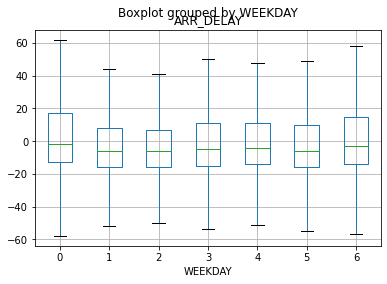

In [15]:
flights_df.boxplot(by='WEEKDAY', column='ARR_DELAY', showfliers=False)

In [16]:
# UNIQUE airlines:
pd.unique(flights_df.loc[:,'AIRLINE_ID'])

array([19805, 20409, 20366, 19690, 20416, 20304, 19977, 21171, 19930,
       19393, 19790, 20436])

In [17]:
# Let's consider weekend days only and find for each carrier the mean arrival delay:
weekend_df = flights_df[ flights_df.loc[:, 'WEEKDAY'].isin([5, 6]) ]
weekend_df.loc[:,['UNIQUE_CARRIER', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER']).mean().rename(columns={'ARR_DELAY':'AVG_WEEKEND_ARR_DELAY'})

,AVG_WEEKEND_ARR_DELAY
UNIQUE_CARRIER,
AA,6.298535
AS,6.016572
B6,16.044561
DL,23.363615
EV,17.592522
F9,8.118907
HA,5.410840
NK,10.667156
OO,9.654595


In [18]:
# Let's consider weekend days only and find for each carrier the mean arrival delay:
working_df = flights_df[ ~flights_df.loc[:, 'WEEKDAY'].isin([5, 6]) ]
working_df.loc[:,['UNIQUE_CARRIER', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER']).mean().rename(columns={'ARR_DELAY':'AVG_WORKING_DAYS_ARR_DELAY'})

,AVG_WORKING_DAYS_ARR_DELAY
UNIQUE_CARRIER,
AA,2.214675
AS,2.254182
B6,5.609369
DL,-1.840765
EV,11.817625
F9,13.690379
HA,2.866092
NK,8.338504
OO,13.511521


In [19]:
# Let's consider weekend days only and find for each carrier and airline the mean arrival delay:
weekend_df = flights_df[ flights_df.loc[:, 'WEEKDAY'].isin([5, 6]) ]
weekend_df.loc[:,['UNIQUE_CARRIER','AIRLINE_ID', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER','AIRLINE_ID']).mean().rename(columns={'ARR_DELAY':'AVG_WEEKEND_ARR_DELAY'})

,,AVG_WEEKEND_ARR_DELAY
UNIQUE_CARRIER,AIRLINE_ID,
AA,19805,6.298535
AS,19930,6.016572
B6,20409,16.044561
DL,19790,23.363615
EV,20366,17.592522
F9,20436,8.118907
HA,19690,5.410840
NK,20416,10.667156
OO,20304,9.654595


In [20]:
# Let's consider working days only and find for each carrier and airline the mean arrival delay:
working_df = flights_df[ ~flights_df.loc[:, 'WEEKDAY'].isin([5, 6]) ]
working_df.loc[:,['UNIQUE_CARRIER','AIRLINE_ID', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER','AIRLINE_ID']).mean().rename(columns={'ARR_DELAY':'AVG_WORKING_DAYS_ARR_DELAY'})

,,AVG_WORKING_DAYS_ARR_DELAY
UNIQUE_CARRIER,AIRLINE_ID,
AA,19805,2.214675
AS,19930,2.254182
B6,20409,5.609369
DL,19790,-1.840765
EV,20366,11.817625
F9,20436,13.690379
HA,19690,2.866092
NK,20416,8.338504
OO,20304,13.511521


In [22]:
# 8: Let's create a multi-indexed df:
mi_df = pd.read_csv(source, index_col=['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'], parse_dates=[0]).drop(columns=['Unnamed: 32'], axis=1)

In [28]:
mi_df.head()

AIRLINE_ID  ... LATE_AIRCRAFT_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                 ...                    
AA             JFK    LAX  2017-01-01       19805  ...                 0.0
               LAX    JFK  2017-01-01       19805  ...                 0.0
                           2017-01-01       19805  ...                35.0
               DFW    HNL  2017-01-01       19805  ...                 0.0
               OGG    DFW  2017-01-01       19805  ...                 0.0

[5 rows x 28 columns]

In [106]:
# For each flight operated by American Airlines (AA) and Delta Airlines (DL), taken off from the Los
# Angeles International Airport (LAX) and for each date, display the departure time and delay
ix = pd.IndexSlice
mi_df.loc[ix[['AA','DL'], 'LAX', :, :], ['DEP_TIME', 'DEP_DELAY']]

DEP_TIME  DEP_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                        
AA             LAX    JFK  2017-01-01     934.0       34.0
                           2017-01-01    1221.0       51.0
                           2017-01-01    2100.0        0.0
                           2017-01-01    1346.0        6.0
                           2017-01-01    2202.0        2.0
...                                         ...        ...
DL             LAX    SLC  2017-01-31    1144.0       -1.0
                      BNA  2017-01-31    1037.0       -3.0
                      IND  2017-01-31    2238.0       -2.0
                      PDX  2017-01-31    1242.0       12.0
                      ATL  2017-01-31    2337.0        2.0

[5464 rows x 2 columns]

In [99]:
# Let's compute for each flight in the first week, with LAX as dest, the mean arrival delay:
import datetime
date_before = datetime.date(2017, 1, 8)
flights_df.loc[(flights_df['FL_DATE'] < '2017-01-08') & (flights_df['DEST']=='LAX'), ['FL_NUM','ARR_DELAY']].groupby('FL_NUM').mean()

,ARR_DELAY
FL_NUM,
1,-3.000000
2,66.428571
4,13.857143
5,2.714286
7,20.857143
...,...
6344,47.000000
6354,60.000000
6522,49.666667


In [67]:
flights_df.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEEKDAY', 'DELAYDELTA'],
      dtype='object')

In [108]:
#  Generate a pivot table containing the number of departed flights for each carrier and for each day
# of the week and show it.
pivot = flights_df.pivot_table(values='FL_NUM', index='UNIQUE_CARRIER', columns='WEEKDAY', dropna=False ,aggfunc='count')
pivot

WEEKDAY,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,12035,11457,9651,9854,9820,7905,11430
AS,2440,2261,1806,1935,1953,1762,2297
B6,4063,3942,3143,3258,3169,2643,3859
DL,12157,11512,9248,9695,9521,6492,10406
EV,5935,5649,4627,4923,4774,2905,5065
F9,1239,1214,976,983,986,955,1245
HA,987,966,791,802,864,826,1022
NK,1954,1970,1616,1610,1563,1470,1946
OO,8321,7912,6413,6631,6667,4913,7409


In [110]:
pivot.T.corr()

UNIQUE_CARRIER,AA,AS,B6,DL,EV,F9,HA,NK,OO,UA,VX,WN
UNIQUE_CARRIER,,,,,,,,,,,,
AA,1.000000,0.945819,0.992210,0.969508,0.941361,0.905097,0.824336,0.945943,0.987100,0.978348,0.984490,0.974882
AS,0.945819,1.000000,0.962874,0.875104,0.812484,0.964065,0.929830,0.947410,0.914970,0.910091,0.898572,0.907263
B6,0.992210,0.962874,1.000000,0.950809,0.910819,0.940669,0.856940,0.975170,0.973749,0.958213,0.959973,0.977848
DL,0.969508,0.875104,0.950809,1.000000,0.991174,0.794245,0.684732,0.867335,0.994891,0.990281,0.986798,0.978026
EV,0.941361,0.812484,0.910819,0.991174,1.000000,0.718502,0.602185,0.808218,0.975723,0.978019,0.978730,0.948396
F9,0.905097,0.964065,0.940669,0.794245,0.718502,1.000000,0.963916,0.980321,0.847372,0.819232,0.821368,0.873601
HA,0.824336,0.929830,0.856940,0.684732,0.602185,0.963916,1.000000,0.902269,0.754106,0.736284,0.738432,0.762183
NK,0.945943,0.947410,0.975170,0.867335,0.808218,0.980321,0.902269,1.000000,0.904720,0.871417,0.877771,0.937891
OO,0.987100,0.914970,0.973749,0.994891,0.975723,0.847372,0.754106,0.904720,1.000000,0.992849,0.990796,0.985596


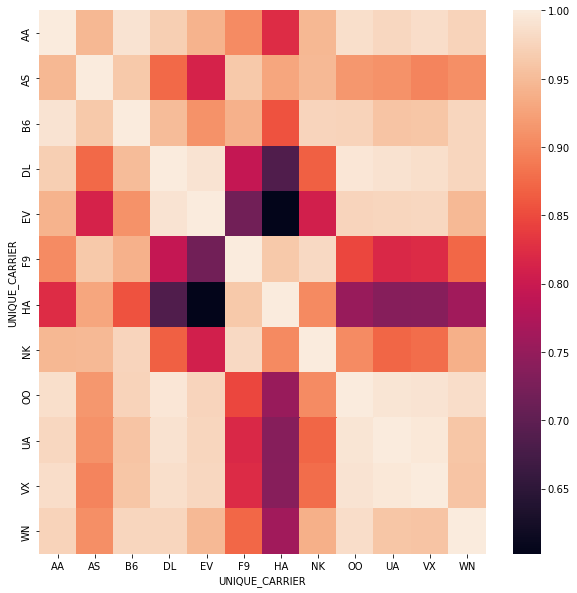

In [112]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(pivot.T.corr())

In [114]:
# Generate a pivot table containing the average arrival delay, for each carrier and for each day of the
# week and show it.

pivot2 = pd.pivot_table(flights_df, values='ARR_DELAY', index='UNIQUE_CARRIER', columns='WEEKDAY', aggfunc='mean')

In [115]:
pivot2

WEEKDAY,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,6.166653,0.899956,-0.733742,1.167107,2.849597,4.184057,7.764121
AS,1.744243,-0.795982,5.797327,4.365145,1.041602,-0.996014,11.400962
B6,12.745117,7.053235,1.656450,-0.285054,4.651251,12.001899,18.823760
DL,5.652933,-4.535590,-5.432658,-4.369801,-2.084867,23.544369,23.250943
EV,22.496612,10.791889,5.689274,8.576665,9.070754,17.576776,17.601550
F9,23.677445,13.563380,8.149744,11.303772,9.160569,3.518868,11.655117
HA,2.127660,1.141969,1.416984,1.624220,8.109954,6.437046,4.578999
NK,15.736303,7.421534,2.780186,7.838409,6.500963,6.157572,14.073158
OO,17.011347,11.123554,10.783691,15.675984,12.453080,7.208863,11.274667


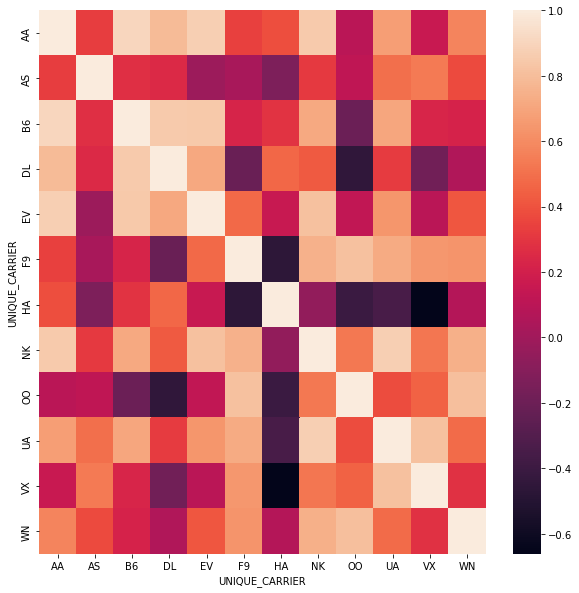

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot2.T.corr())

In [122]:
# For the carriers HA, DL, AA and AS compute the average deltadelay for each day of the week
restricted_df = flights_df.loc[ flights_df['UNIQUE_CARRIER'].isin(['HA','DL','AA','AS'])]
pivot3 = pd.pivot_table(restricted_df, values='DELAYDELTA', index='UNIQUE_CARRIER', columns='WEEKDAY', aggfunc='mean')
pivot3

WEEKDAY,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,-3.576209,-4.621619,-4.601184,-4.091436,-3.553686,-4.558771,-3.747053
AS,-1.690789,-1.625446,-1.889198,-2.130705,-2.624551,-3.453872,0.542632
DL,-8.913563,-10.211625,-10.544913,-10.604603,-9.623199,-5.979988,-7.001644
HA,0.258359,0.307772,0.759189,0.390762,0.746528,1.330508,1.207066


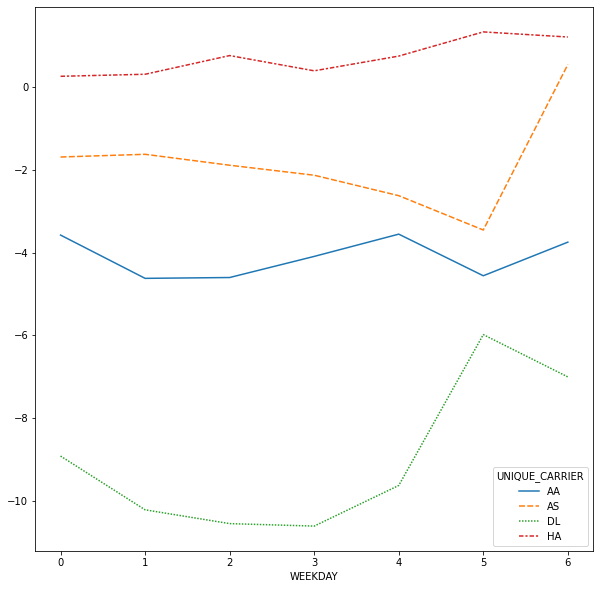

In [130]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=pivot3.T)